<a href="https://colab.research.google.com/github/rocx320/MachineLearning/blob/main/2247226_Lab5_Linear_Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df_housing = pd.read_csv('/content/drive/MyDrive/data/HousingPrice.csv')
df_housing.head()

,Date House was sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area,Lot Area,No of Floors,WaterfrontView,No of Times Visited,Condition of the House,Area of the House from Basement,Basement Area,yr_built,Year of Renovation,Street,City,Zipcode,Country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df_basketball = pd.read_csv('/content/drive/MyDrive/data/basketball_Data.csv')
df_basketball.head()

,id,year,rank,school,games,wins,losses,win_percentage,conference_wins,conference_losses,...,offensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,opponent_points,simple_rating
0,1,2021,1,Villanova,38,30,8,0.789,16,4,...,10.3,34.8,11.9,6.0,2.2,9.9,14.9,71.7,62.7,19.31
1,2,2021,2,Providence,33,27,6,0.818,14,3,...,10.5,37.6,13.2,5.0,3.7,11.4,16.0,71.5,66.2,13.08
2,3,2021,3,UConn,33,23,10,0.697,13,6,...,13.8,40.4,14.0,5.9,6.4,11.8,16.8,74.8,65.3,16.40
3,4,2021,4,Creighton,35,23,12,0.657,12,7,...,9.6,38.1,13.3,5.5,4.3,14.1,13.6,69.2,66.4,11.34
4,5,2021,5,Marquette,32,19,13,0.594,11,8,...,7.8,34.8,16.0,7.8,5.2,12.4,17.4,74.0,71.6,11.36


In [5]:
import sys
import os
import io
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

# Housing Data - Linear Regression

In [6]:
df_housing.drop('Year of Renovation',axis=1, inplace=True)

In [12]:
df = df_housing

<ipython-input-11-be3f6a98778a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_housing.corr(), annot = True, cmap="YlGnBu")


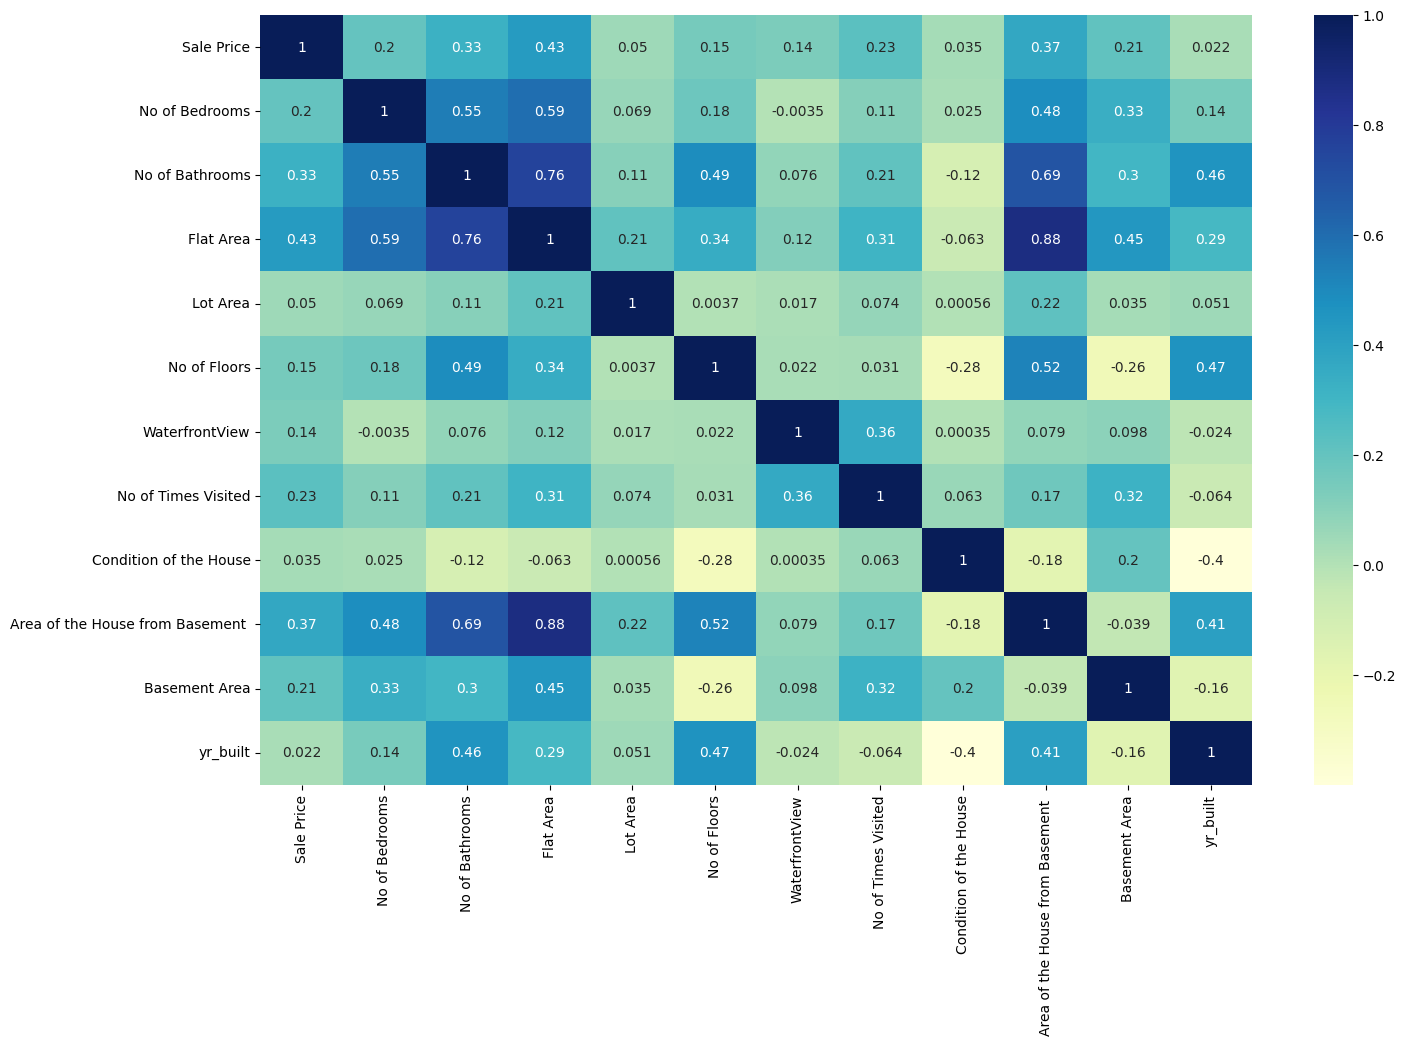

In [11]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
plt.figure(figsize = (16, 10))
sns.heatmap(df_housing.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [8]:
df_housing['Sale Price'].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: Sale Price, dtype: float64

In [14]:
x=df_housing.iloc[:,:12]
x.head()

,Date House was sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area,Lot Area,No of Floors,WaterfrontView,No of Times Visited,Condition of the House,Area of the House from Basement,Basement Area
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800


In [ ]:
x=x.drop('Date House was sold',axis=1)

In [18]:
x.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area,Lot Area,No of Floors,WaterfrontView,No of Times Visited,Condition of the House,Area of the House from Basement,Basement Area
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800


In [19]:
from sklearn.model_selection import train_test_split
X = x.drop('Flat Area',axis=1) # Independet variable
y = x['Flat Area']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler_train= MinMaxScaler()
scaler_train.fit(X_train)
scaler_test= MinMaxScaler()
scaler_test.fit(X_test)
x_train_scaled= scaler_train.transform(X_train)
x_test_scaled= scaler_test.transform(X_test)


In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred=lin_reg.predict(X_test)

In [24]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 4.001086146085735e-20
r square : 1.0


In [25]:
lin_reg.score(X_train,y_train)

1.0

In [26]:
lin_reg.intercept_

8.594724931754172e-11

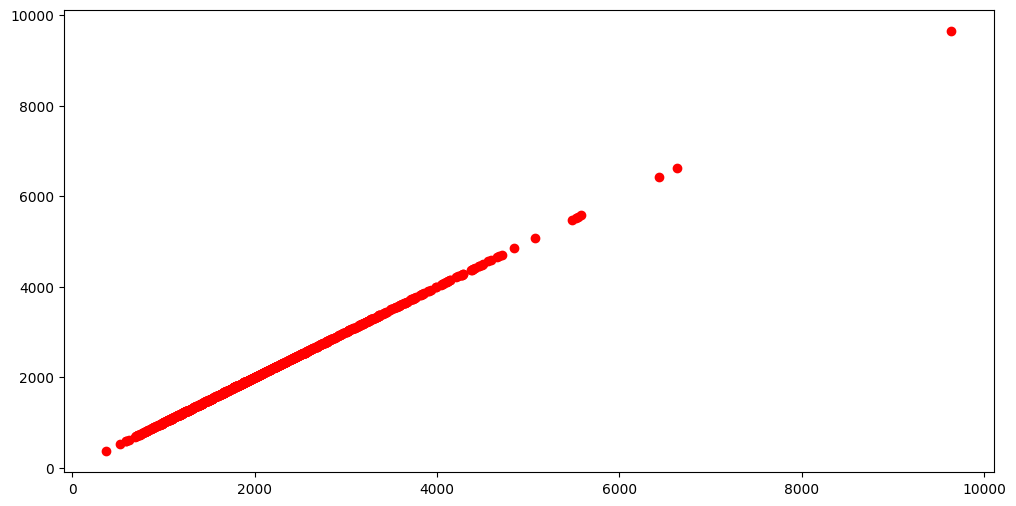

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='r',linestyle='-')
plt.show()

# Basketball Data - Logistic Regression

In [28]:
df2 = df_basketball

In [29]:
df2.head()

,id,year,rank,school,games,wins,losses,win_percentage,conference_wins,conference_losses,...,offensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,opponent_points,simple_rating
0,1,2021,1,Villanova,38,30,8,0.789,16,4,...,10.3,34.8,11.9,6.0,2.2,9.9,14.9,71.7,62.7,19.31
1,2,2021,2,Providence,33,27,6,0.818,14,3,...,10.5,37.6,13.2,5.0,3.7,11.4,16.0,71.5,66.2,13.08
2,3,2021,3,UConn,33,23,10,0.697,13,6,...,13.8,40.4,14.0,5.9,6.4,11.8,16.8,74.8,65.3,16.40
3,4,2021,4,Creighton,35,23,12,0.657,12,7,...,9.6,38.1,13.3,5.5,4.3,14.1,13.6,69.2,66.4,11.34
4,5,2021,5,Marquette,32,19,13,0.594,11,8,...,7.8,34.8,16.0,7.8,5.2,12.4,17.4,74.0,71.6,11.36


In [30]:
categorical = [var for var in df2.columns if df2[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 1 categorical variables

The categorical variables are : ['school']


In [31]:
for var in categorical:
    print(var, ' contains ', len(df2[var].unique()), ' labels')

school  contains  22  labels


In [32]:
df2.school.value_counts()

Seton Hall         43
St. John's (NY)    43
Georgetown         43
Providence         43
Villanova          42
UConn              36
Syracuse           34
Pitt               31
Boston College     26
Rutgers            18
Notre Dame         18
Marquette          17
West Virginia      17
DePaul             17
Miami (FL)         13
Butler              9
Xavier              9
Creighton           9
Cincinnati          8
South Florida       8
Louisville          8
Virginia Tech       4
Name: school, dtype: int64

<Axes: xlabel='school', ylabel='count'>

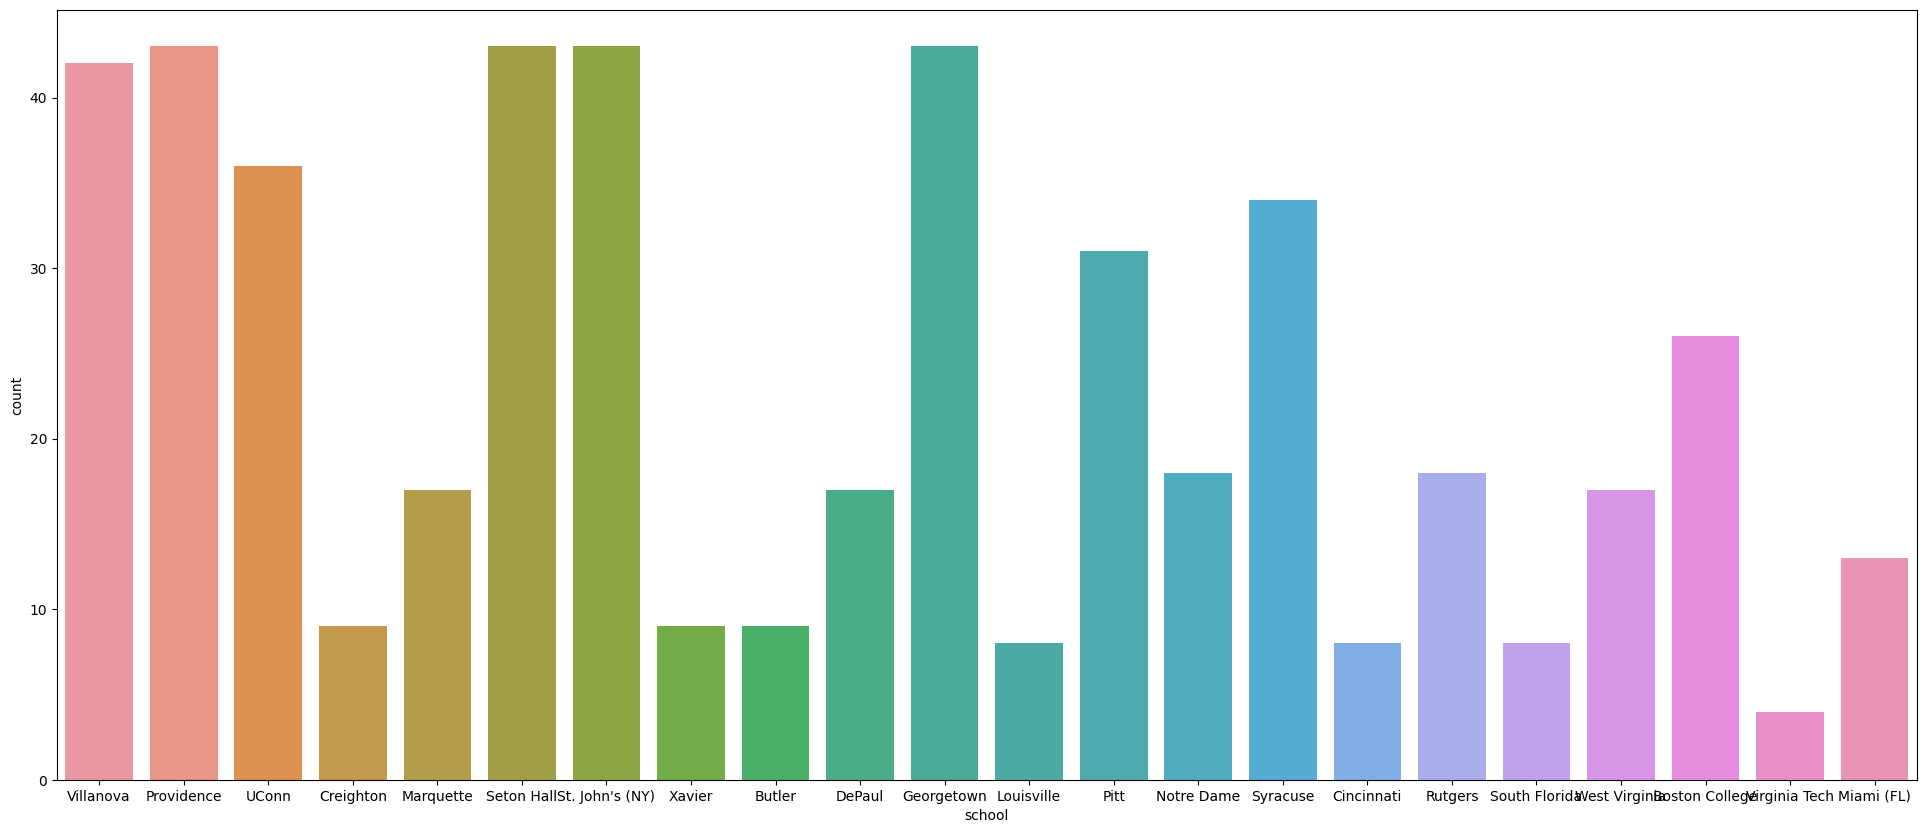

In [33]:
plt.figure(figsize=(24,10))
sns.countplot(x = df2['school'], data = df2['school'])

In [34]:
df2.isnull().sum().sort_values(ascending=False)

net_rating                         278
defensive_rating                   278
offensive_rating                   278
away_wins                          208
home_losses                        208
away_losses                        208
home_wins                          208
offensive_rebounds                 159
3_pointer_percentage                58
3_pointer_attempts                  58
3_pointers                          58
effective_field_goal_percentage     58
turnovers                           20
blocks                              19
personal_fouls                      19
steals                              16
assists                              7
free_throws                          0
total_rebounds                       0
free_throw_percentage                0
free_throw_attempts                  0
points                               0
opponent_points                      0
id                                   0
field_goal_attempts                  0
field_goal_percentage    

In [35]:
df2.dropna(inplace=True)

In [36]:
df2.isnull().sum().sort_values(ascending=False)

id                                 0
field_goal_percentage              0
3_pointer_attempts                 0
3_pointer_percentage               0
effective_field_goal_percentage    0
free_throws                        0
free_throw_attempts                0
free_throw_percentage              0
offensive_rebounds                 0
total_rebounds                     0
assists                            0
steals                             0
blocks                             0
turnovers                          0
personal_fouls                     0
points                             0
opponent_points                    0
3_pointers                         0
field_goal_attempts                0
year                               0
field_goals                        0
rank                               0
school                             0
games                              0
wins                               0
losses                             0
win_percentage                     0
c

In [37]:
X = df2.drop(['school'], axis=1)
y=df2['school']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [42]:
y_pred_test = logreg.predict(X_test)
print(y_pred_test)

['Villanova' 'Villanova' "St. John's (NY)" 'Marquette' 'Butler' 'Butler'
 "St. John's (NY)" 'Providence' 'Providence' 'Providence' 'Xavier'
 'DePaul' 'Notre Dame' 'Marquette' 'DePaul' 'Georgetown' "St. John's (NY)"
 "St. John's (NY)" 'Providence' "St. John's (NY)" 'Providence'
 'Georgetown' 'Villanova' 'DePaul' 'Villanova' 'Marquette' 'Creighton'
 'Villanova' 'Louisville' "St. John's (NY)" 'Butler' 'DePaul' 'Cincinnati'
 'Marquette' 'Seton Hall' 'Georgetown' 'DePaul' 'Creighton'
 "St. John's (NY)" 'Seton Hall' 'Georgetown' 'Villanova' "St. John's (NY)"
 'Villanova' 'DePaul' "St. John's (NY)" 'DePaul' 'Providence' 'Providence'
 'Villanova' 'Seton Hall']


In [43]:
logreg.predict_proba(X_test)

array([[0.01768916, 0.00490527, 0.07509338, ..., 0.00067789, 0.01322038,
        0.15916957],
       [0.0455649 , 0.0274847 , 0.04754457, ..., 0.00282733, 0.01367142,
        0.08925825],
       [0.06771175, 0.01509671, 0.04070753, ..., 0.00569646, 0.02332635,
        0.11235236],
       ...,
       [0.02693862, 0.04100401, 0.02054081, ..., 0.00375515, 0.051078  ,
        0.07888898],
       [0.01495183, 0.060699  , 0.0154918 , ..., 0.00310235, 0.06624376,
        0.07090315],
       [0.01330091, 0.04838572, 0.00993044, ..., 0.02688138, 0.0566992 ,
        0.01577028]])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test)

0.23529411764705882

In [45]:
y_pred_train = logreg.predict(X_train)
print(y_pred_train)

['Seton Hall' 'Villanova' 'Syracuse' 'Creighton' 'Providence' 'Xavier'
 'Villanova' 'Xavier' 'Villanova' 'Marquette' 'Villanova'
 "St. John's (NY)" 'Georgetown' 'Seton Hall' 'Providence' 'Xavier'
 'Villanova' 'Providence' 'Providence' "St. John's (NY)" 'Villanova'
 'Pitt' "St. John's (NY)" 'DePaul' 'Cincinnati' 'Georgetown' 'Villanova'
 "St. John's (NY)" 'DePaul' 'Marquette' 'Butler' 'Rutgers' 'Georgetown'
 "St. John's (NY)" 'Villanova' 'DePaul' 'Providence' 'Georgetown'
 'Georgetown' 'DePaul' 'DePaul' 'DePaul' 'Marquette' 'Villanova'
 'Villanova' 'Marquette' 'Georgetown' 'Cincinnati' 'Xavier' 'DePaul'
 'Providence' 'DePaul' 'Georgetown' 'Creighton' 'Xavier' 'DePaul'
 "St. John's (NY)" 'Louisville' 'Butler' 'Villanova' 'Seton Hall'
 'Notre Dame' 'Creighton' 'Villanova' 'Butler' 'Cincinnati' 'Syracuse'
 'Xavier' 'Providence' 'DePaul' 'DePaul' 'Seton Hall' 'Butler' 'Pitt'
 'Butler' 'Notre Dame' 'South Florida' 'DePaul' 'Butler' 'Marquette'
 'Villanova' 'Xavier' 'DePaul' 'Villanova' 'Butl

In [46]:
accuracy_score(y_train,y_pred_train)

0.6153846153846154